# PCA ON THE DATA SET 

In [39]:
#import the required libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline



In [40]:
#use pandas to get the data 
df = pd.read_csv (r'C:\Users\PromiseEkpo\Documents\promise\promise folder\knu folder\question 1\Dataset NIR Spectrum of Animal Feed2.csv')
print (df)


    samples   999.9  1000.3  1000.7  1001.1  1001.4  1001.8  1002.2  1002.6  \
0         1  0.3344  0.3340  0.3340  0.3343  0.3343  0.3338  0.3338  0.3340   
1         2  0.3310  0.3305  0.3306  0.3312  0.3313  0.3309  0.3310  0.3315   
2         3  0.3284  0.3279  0.3280  0.3283  0.3281  0.3278  0.3278  0.3280   
3         4  0.3643  0.3634  0.3634  0.3634  0.3634  0.3633  0.3636  0.3636   
4         5  0.3568  0.3561  0.3558  0.3561  0.3561  0.3559  0.3559  0.3557   
5         6  0.3360  0.3356  0.3356  0.3357  0.3357  0.3354  0.3353  0.3351   
6         7  0.3286  0.3280  0.3279  0.3283  0.3283  0.3280  0.3282  0.3284   
7         8  0.3579  0.3570  0.3569  0.3572  0.3571  0.3568  0.3568  0.3568   
8         9  0.3631  0.3628  0.3626  0.3627  0.3625  0.3619  0.3617  0.3617   
9        10  0.3508  0.3505  0.3503  0.3504  0.3503  0.3498  0.3497  0.3496   
10       11  0.3589  0.3586  0.3582  0.3585  0.3587  0.3582  0.3578  0.3578   
11       12  0.3551  0.3548  0.3547  0.3551  0.3551 

In [59]:
#to see the top 5 rows
df.head()

,index,samples,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,...,2488.2,2490.6,2493,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
0,0,1,0.3344,0.3340,0.3340,0.3343,0.3343,0.3338,0.3338,0.3340,...,1.0136,1.0115,1.0099,1.0088,1.0079,1.0071,51.69,50.50,24.98,18.10
1,1,2,0.3310,0.3305,0.3306,0.3312,0.3313,0.3309,0.3310,0.3315,...,1.0192,1.0167,1.0146,1.0130,1.0122,1.0114,52.97,50.35,32.06,18.65
2,2,3,0.3284,0.3279,0.3280,0.3283,0.3281,0.3278,0.3278,0.3280,...,1.0135,1.0109,1.0088,1.0074,1.0067,1.0059,52.19,49.99,49.77,17.09
3,3,4,0.3643,0.3634,0.3634,0.3634,0.3634,0.3633,0.3636,0.3636,...,1.0620,1.0590,1.0567,1.0552,1.0545,1.0536,52.16,49.75,39.46,18.00
4,4,5,0.3568,0.3561,0.3558,0.3561,0.3561,0.3559,0.3559,0.3557,...,1.0666,1.0644,1.0624,1.0610,1.0602,1.0595,50.34,48.56,32.52,18.67


In [60]:
#to view the keys of the data
df.keys()

Index(['index', 'samples', '999.9', '1000.3', '1000.7', '1001.1', '1001.4',
       '1001.8', '1002.2', '1002.6',
       ...
       '2488.2', '2490.6', '2493', '2495.4', '2497.8', '2500.2', 'IVOMD',
       'IVDMD', 'NDF', 'ADF'],
      dtype='object', length=1563)

In [61]:
#to print the data on the 2490.6 row
print(df['2490.6'])

0     1.0115
1     1.0167
2     1.0109
3     1.0590
4     1.0644
5     0.9935
6     0.9866
7     1.0307
8     1.1963
9     1.1239
10    1.1538
11    1.1122
12    1.1325
13    1.0912
14    1.1281
15    1.0561
16    1.1162
17    1.1976
18    1.1792
19    1.2038
20    1.2192
21    1.1354
22    1.0958
23    1.1520
24    1.1333
Name: 2490.6, dtype: float64


In [62]:
#to change all NaN values to o 
df.fillna(0)


,index,samples,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,...,2488.2,2490.6,2493,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
0,0,1,0.3344,0.3340,0.3340,0.3343,0.3343,0.3338,0.3338,0.3340,...,1.0136,1.0115,1.0099,1.0088,1.0079,1.0071,51.69,50.50,24.98,18.10
1,1,2,0.3310,0.3305,0.3306,0.3312,0.3313,0.3309,0.3310,0.3315,...,1.0192,1.0167,1.0146,1.0130,1.0122,1.0114,52.97,50.35,32.06,18.65
2,2,3,0.3284,0.3279,0.3280,0.3283,0.3281,0.3278,0.3278,0.3280,...,1.0135,1.0109,1.0088,1.0074,1.0067,1.0059,52.19,49.99,49.77,17.09
3,3,4,0.3643,0.3634,0.3634,0.3634,0.3634,0.3633,0.3636,0.3636,...,1.0620,1.0590,1.0567,1.0552,1.0545,1.0536,52.16,49.75,39.46,18.00
4,4,5,0.3568,0.3561,0.3558,0.3561,0.3561,0.3559,0.3559,0.3557,...,1.0666,1.0644,1.0624,1.0610,1.0602,1.0595,50.34,48.56,32.52,18.67
5,5,6,0.3360,0.3356,0.3356,0.3357,0.3357,0.3354,0.3353,0.3351,...,0.9967,0.9935,0.9909,0.9894,0.9886,0.9875,54.25,52.09,24.29,15.30
6,6,7,0.3286,0.3280,0.3279,0.3283,0.3283,0.3280,0.3282,0.3284,...,0.9896,0.9866,0.9843,0.9827,0.9818,0.9808,54.15,52.71,24.21,16.77
7,7,8,0.3579,0.3570,0.3569,0.3572,0.3571,0.3568,0.3568,0.3568,...,1.0333,1.0307,1.0286,1.0271,1.0263,1.0252,54.75,53.00,24.68,16.73
8,8,9,0.3631,0.3628,0.3626,0.3627,0.3625,0.3619,0.3617,0.3617,...,1.1986,1.1963,1.1941,1.1924,1.1913,1.1906,55.85,53.90,27.61,16.10
9,9,10,0.3508,0.3505,0.3503,0.3504,0.3503,0.3498,0.3497,0.3496,...,1.1260,1.1239,1.1219,1.1204,1.1195,1.1188,53.08,51.27,26.14,17.16


In [63]:
#Condition to check for any NaN value in the data set 
np.any(np.isnan(df))

False

In [64]:
#Condition to check whether all numbers are finite in the data set, this is important for the fit method to work  
np.all(np.isfinite(df))

True

In [65]:
# to reset the index of the data
df = df.reset_index()

In [66]:
#METHOD to scale the data
scaler=StandardScaler()
scaler.fit(df)


StandardScaler()

In [67]:
#transform the data
scaled_data=scaler.transform(df)

In [68]:
#View transformed data
scaled_data

array([[-1.66410059, -1.66410059, -1.66410059, ..., -1.11441975,
        -0.40671748,  0.65648614],
       [-1.52542554, -1.52542554, -1.52542554, ..., -1.16032346,
         0.8054225 ,  1.24187423],
       [-1.38675049, -1.38675049, -1.38675049, ..., -1.27049237,
         3.83748451, -0.41849927],
       ...,
       [ 1.38675049,  1.38675049,  1.38675049, ..., -0.03721261,
        -0.45807934,  0.55005194],
       [ 1.52542554,  1.52542554,  1.52542554, ...,  0.66970457,
        -0.73372134, -0.54622031],
       [ 1.66410059,  1.66410059,  1.66410059, ...,  0.43100526,
        -0.89979137, -0.21627429]])

In [69]:
import numpy as np
scaled_data[np.isnan(scaled_data)] = 0

In [70]:
scaled_data

array([[-1.66410059, -1.66410059, -1.66410059, ..., -1.11441975,
        -0.40671748,  0.65648614],
       [-1.52542554, -1.52542554, -1.52542554, ..., -1.16032346,
         0.8054225 ,  1.24187423],
       [-1.38675049, -1.38675049, -1.38675049, ..., -1.27049237,
         3.83748451, -0.41849927],
       ...,
       [ 1.38675049,  1.38675049,  1.38675049, ..., -0.03721261,
        -0.45807934,  0.55005194],
       [ 1.52542554,  1.52542554,  1.52542554, ...,  0.66970457,
        -0.73372134, -0.54622031],
       [ 1.66410059,  1.66410059,  1.66410059, ...,  0.43100526,
        -0.89979137, -0.21627429]])

In [71]:
#Import PCA method
from sklearn.decomposition import PCA

In [72]:
#set the number of Principal Components you want to use 
pca=PCA(n_components=5)

In [73]:
#to scale the data 
pca.fit(scaled_data)

PCA(n_components=5)

In [81]:
x_pca= pca.transform(scaled_data)

In [82]:
#to view the data shape before selection of Components 
scaled_data.shape

(25, 1564)

In [83]:
#to view the data shape after selection of Components 
x_pca.shape

(25, 5)

# APPLY REGRESSION

In [84]:
scaled_data

array([[-1.66410059, -1.66410059, -1.66410059, ..., -1.11441975,
        -0.40671748,  0.65648614],
       [-1.52542554, -1.52542554, -1.52542554, ..., -1.16032346,
         0.8054225 ,  1.24187423],
       [-1.38675049, -1.38675049, -1.38675049, ..., -1.27049237,
         3.83748451, -0.41849927],
       ...,
       [ 1.38675049,  1.38675049,  1.38675049, ..., -0.03721261,
        -0.45807934,  0.55005194],
       [ 1.52542554,  1.52542554,  1.52542554, ...,  0.66970457,
        -0.73372134, -0.54622031],
       [ 1.66410059,  1.66410059,  1.66410059, ...,  0.43100526,
        -0.89979137, -0.21627429]])

In [85]:
x_pca

array([[ 5.80963278e+01, -1.25518925e-01,  2.08906024e+00,
         4.25212888e-01,  3.33490983e-01],
       [ 5.81284958e+01,  1.49927892e+00,  2.05082052e+00,
         1.13001897e+00,  1.59538446e-02],
       [ 6.30270366e+01,  1.89998289e+00,  2.49760810e+00,
         1.51609970e+00, -1.75625265e+00],
       [ 7.38940125e+00, -1.14939428e+01, -7.30632696e+00,
         3.30723401e+00, -5.64338148e-01],
       [ 1.27729763e+01, -2.85105898e+00, -5.64957238e+00,
         3.27038128e+00,  1.07360426e+00],
       [ 6.07450218e+01, -6.66463879e+00,  1.54899310e+00,
        -9.11906152e-01, -1.26468242e+00],
       [ 7.04958390e+01, -1.80636768e+00,  3.38979816e+00,
        -1.10171810e+00,  2.81488944e-02],
       [ 2.23130170e+01, -1.10774621e+01, -5.33435702e+00,
         1.25960384e+00,  1.15008214e+00],
       [-2.44920868e+01,  2.74707732e+01, -2.55264933e+00,
        -8.13762166e-01, -2.43790661e+00],
       [ 1.03755556e+01,  2.07401204e+01,  6.04453055e-01,
        -1.21424229e+00

In [86]:
#import library to plot graphs
import matplotlib as plt
%matplotlib inline

In [87]:
import matplotlib.pyplot as plt

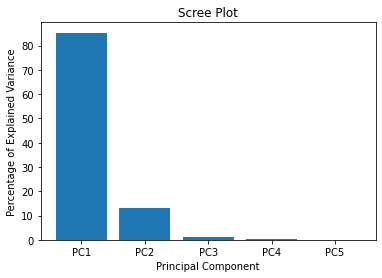

In [88]:
#toplot graph
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


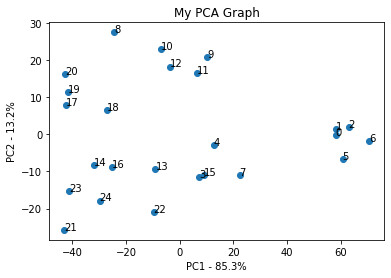

In [89]:
pca_df = pd.DataFrame(x_pca, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [90]:
The graph above shows how each sample varies with PC1 and PC2

SyntaxError: invalid syntax (<ipython-input-90-b25fa4754087>, line 1)

In [91]:
loading_scores = pd.Series(pca.components_[0])

## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_samples = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_samples])

736   -0.027250
726   -0.027247
725   -0.027245
737   -0.027245
735   -0.027245
724   -0.027244
727   -0.027244
723   -0.027240
729   -0.027239
728   -0.027238
dtype: float64


In [95]:
y = df['samples']

# Create linear regression object

In [119]:
def pcr(X,y,pc):
    
 regr = linear_model.LinearRegression() 

# Fit 
 regr.fit(x_pca, y) 

# Calibration 
 y_c = regr.predict(x_pca) 

# Cross-validation 
 y_cv = cross_val_predict(regr, x_pca, y, cv=10) 

# Calculate scores for calibration and cross-validation 
 score_c = r2_score(y, y_c) 
 score_cv = r2_score(y, y_cv)

# Calculate mean square error for calibration and cross validation 
 mse_c = mean_squared_error(y, y_c) 
 mse_cv = mean_squared_error(y, y_cv)

 return(y_cv, score_c, score_cv, mse_c, mse_cv)

In [ ]:
First, how do we know if we’ve done a good job? 
The metrics we use are the coefficient of determination ( R^{2}) 
and the mean squared error (MSE). 
The ideas goes like this. 
With the regr.fit(Xreg, y) command
we generate the coefficients of the linear fit (slope mm and intercept qq).

# Build of our calibration model

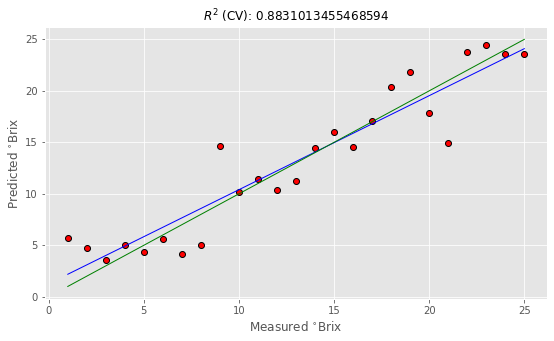

In [126]:
 predicted, r2r, r2cv, mser, mscv = pcr(x_pca,y, pc=6)
# Regression plot
 z = np.polyfit(y, predicted, 1)
 with plt.style.context(('ggplot')):
  fig, ax = plt.subplots(figsize=(9, 5))
 ax.scatter(y, predicted, c='red', edgecolors='k')
 ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
 ax.plot(y, y, color='green', linewidth=1)
 plt.title('$R^{2}$ (CV): '+str(r2cv))
 plt.xlabel('Measured $^{\circ}$Brix')
 plt.ylabel('Predicted $^{\circ}$Brix')
 plt.show()

In [ ]:
The green line represents the ideal, 100%, correlation between measured and predicted values. 
The blue line is the actual correlation.  With Coefficient of Determination, R^{2}= 0.883101

The result is  great, and a number of other things are required to improve this figure. 

In [ ]:
Hence the model derived is great